**MISY3870 SPECIAL TOPICS (INTRODUCTIN TO PYTHON PRGRAMMING) PROJECT**


```

```


Group: Stroke of Luck


```

```

Members: 
1. Hilal Yavuz 218CS2112
2. Elif Akar 217CS2012
3. Necdet Batuhan Mıcık 217CS2002


          

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#The dataset consisted of 10 metrics for a total of 5110 patients.
#These metrics included patients’ population statistics data (gender, age, marital status, type of work and residence type) and health records (hypertension, heart disease, average glucose level measured after meal, Body Mass Index (BMI), smoking status and stroke experience).

In [ ]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

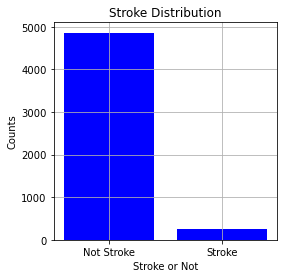

In [ ]:
plt.figure(figsize=(4,4))
plt.bar(['Not Stroke','Stroke'],data['stroke'].value_counts(), color=['blue'])
plt.title("Stroke Distribution")
plt.ylabel("Counts")
plt.xlabel("Stroke or Not")
plt.grid()
plt.show()

In [ ]:
data.drop(columns=['id'], inplace=True)
data = data.drop(data[(data['gender']=="Other")].index)
#cleaning data from NaN values and outliers.

In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
mean = data['bmi'].mean()
data['bmi'] = data['bmi'].fillna(mean)
#We filled the NaN values with the bmi mean value so that the operations to be performed on bmi are not misleading.

In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

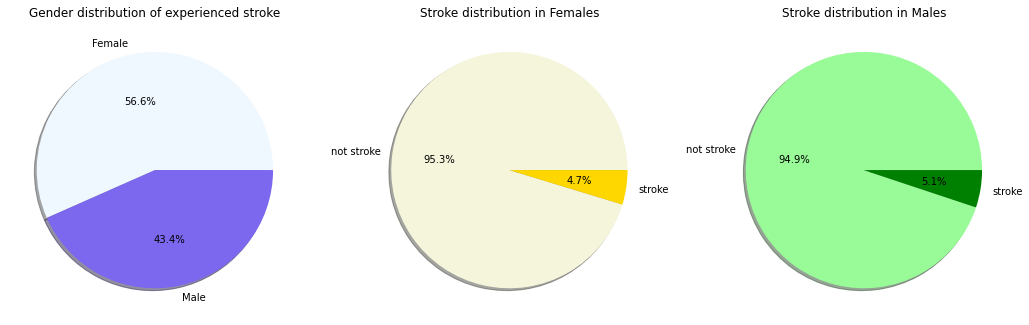

,gender,stroke,counts
0,Female,0,2853
1,Female,1,141
2,Male,0,2007
3,Male,1,108


In [ ]:
#examining the relationship between gender and stroke
gend = data.groupby(['gender','stroke']).count()
gend = gend.reset_index()
gend['counts'] = gend.iloc[:,2]
stroke = gend[gend['stroke']==1]
female= gend[gend['gender']=="Female"]
male= gend[gend['gender']=="Male"]
fig = plt.figure(figsize=(18,6))
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(stroke['counts'],labels=stroke['gender'],autopct='%1.1f%%',colors=['#F0F8FF','#7B68EE'],shadow=True)
plt.title("Gender distribution of experienced stroke")
ax1 = plt.subplot2grid((1,3),(0,1))
plt.pie(female['counts'],labels=['not stroke','stroke'],autopct='%1.1f%%', colors=['#F5F5DC','#FFD700'],shadow=True)
plt.title("Stroke distribution in Females")
ax1 = plt.subplot2grid((1,3),(0,2))
plt.pie(male['counts'],labels=['not stroke','stroke'],autopct='%1.1f%%', colors=['#98FB98','#008000'],shadow=True)
plt.title("Stroke distribution in Males")
plt.show()
gend = gend[['gender','stroke','counts']]
gend

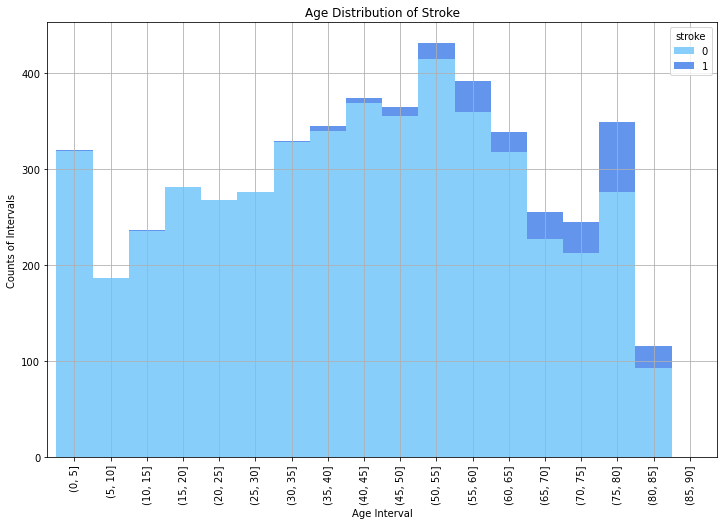

stroke,0,1
age_range,,
"(0, 5]",319,1
"(5, 10]",187,0
"(10, 15]",236,1
"(15, 20]",281,0
"(20, 25]",268,0
"(25, 30]",276,0
"(30, 35]",328,1
"(35, 40]",340,5
"(40, 45]",369,5


In [ ]:
#examining the relationship between age and stroke
data['age_range'] = pd.cut(data['age'], np.arange(0, 91, 5))
data_groupByAge = data.groupby(["age_range", 'stroke'])['age'].count()
data_groupByAge = data_groupByAge.unstack()
data_groupByAge.plot.bar(stacked=True, figsize=(12,8), width=1, color=['#87CEFA','#6495ED']);
plt.xlabel("Age Interval")
plt.ylabel("Counts of Intervals")
plt.title("Age Distribution of Stroke")
plt.grid()
plt.show()
data_groupByAge

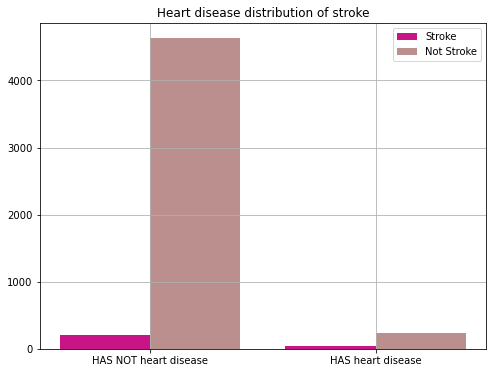

,heart_disease,stroke,gender
0,0,0,4631
1,0,1,202
2,1,0,229
3,1,1,47


In [ ]:
#examining the relationship between heart disease and stroke
dt = data.groupby(['heart_disease','stroke']).count().reset_index()
dt = dt.iloc[:,0:3]
X = ['HAS NOT heart disease','HAS heart disease']
X_axis = np.arange(len(X))
y = dt[dt["stroke"]==1].iloc[:,2]
z = dt[dt["stroke"]==0].iloc[:,2]
plt.figure(figsize=(8,6))
plt.bar(X_axis - 0.2, y, 0.4, label = 'Stroke', color=['#C71585'])
plt.bar(X_axis + 0.2, z, 0.4, label = 'Not Stroke', color=['#BC8F8F'])
plt.xticks(X_axis, X)
plt.title("Heart disease distribution of stroke")
plt.legend()
plt.grid()
plt.show()
dt

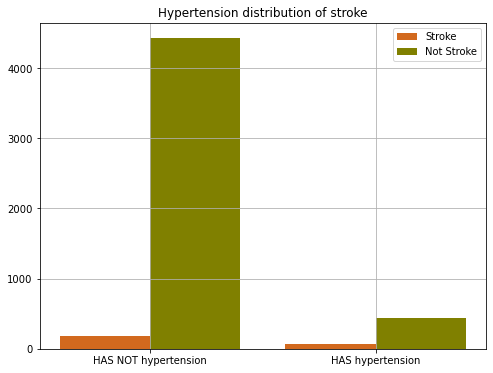

,hypertension,stroke,gender
0,0,0,4428
1,0,1,183
2,1,0,432
3,1,1,66


In [ ]:
#examining the relationship between hypertension and stroke
dt = data.groupby(['hypertension','stroke']).count().reset_index()
dt = dt.iloc[:,0:3]
X = ['HAS NOT hypertension','HAS hypertension']
X_axis = np.arange(len(X))
y = dt[dt["stroke"]==1].iloc[:,2]
z = dt[dt["stroke"]==0].iloc[:,2]
plt.figure(figsize=(8,6))
plt.bar(X_axis - 0.2, y, 0.4, label = 'Stroke', color=['#D2691E'])
plt.bar(X_axis + 0.2, z, 0.4, label = 'Not Stroke', color=['#808000'])
plt.xticks(X_axis, X)
plt.title("Hypertension distribution of stroke")
plt.legend()
plt.grid()
plt.show()
dt

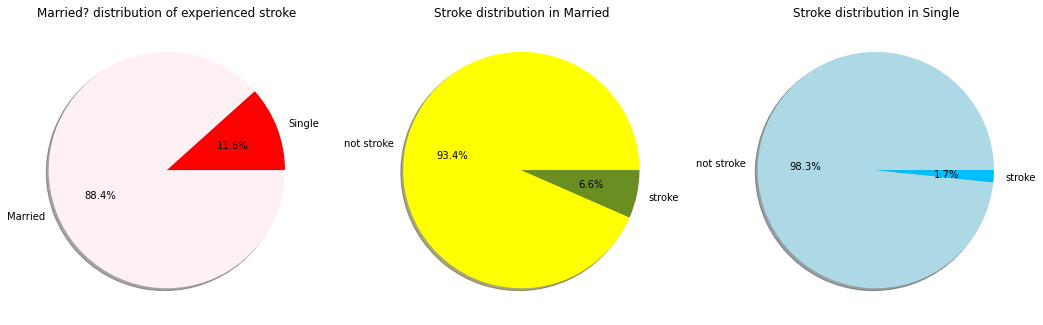

,ever_married,stroke,counts
0,No,0,1727
1,No,1,29
2,Yes,0,3133
3,Yes,1,220


In [ ]:
#examining the relationship between married status and stroke
mr = data.groupby(['ever_married','stroke']).count()
mr = mr.reset_index()
mr['counts'] = mr.iloc[:,2]
stroke = mr[mr['stroke']==1]
married= mr[mr['ever_married']=="Yes"]
single= mr[mr['ever_married']=="No"]
fig = plt.figure(figsize=(18,6))
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(stroke['counts'],labels=['Single','Married'],autopct='%1.1f%%',colors=['#FF0000','#FFF0F5'],shadow=True)
plt.title("Married? distribution of experienced stroke")
ax1 = plt.subplot2grid((1,3),(0,1))
plt.pie(married['counts'],labels=['not stroke','stroke'],autopct='%1.1f%%', colors=['#FFFF00','#6B8E23'],shadow=True)
plt.title("Stroke distribution in Married")
ax1 = plt.subplot2grid((1,3),(0,2))
plt.pie(single['counts'],labels=['not stroke','stroke'],autopct='%1.1f%%', colors=['#ADD8E6','#00BFFF'],shadow=True)
plt.title("Stroke distribution in Single")
plt.show()
mr = mr[['ever_married','stroke','counts']]
mr

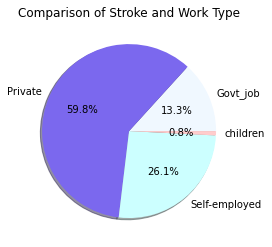

,work_type,stroke,counts
1,Govt_job,1,33
4,Private,1,149
6,Self-employed,1,65
8,children,1,2


In [ ]:
#examining the relationship between work type and stroke
work_type = data.groupby(['work_type','stroke']).count()
work_type = work_type.reset_index()
work_type['counts'] = work_type.iloc[:,2]
work_type = work_type[work_type['stroke']==1]
plt.title('Comparison of Stroke and Work Type')
plt.pie(work_type['counts'],labels=work_type['work_type'],autopct='%1.1f%%',colors=['#F0F8FF','#7B68EE','#CCFFFF',
                                                                                    '#FFCCCC','66CC00'],shadow=True)
plt.show()
work_type = work_type[['work_type','stroke','counts']]
work_type

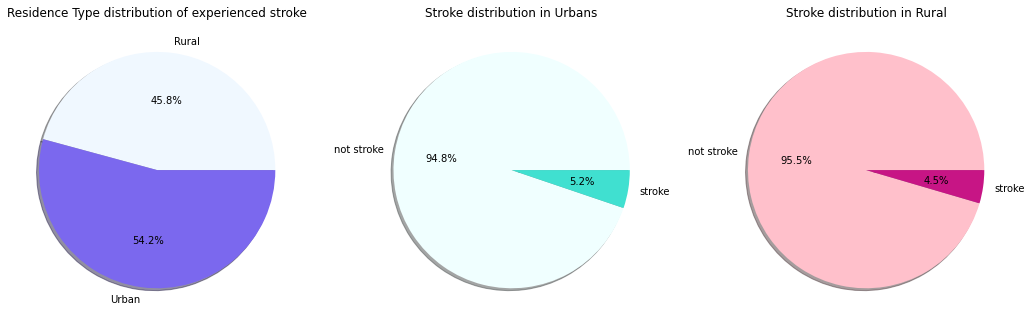

,Residence_type,stroke,counts
0,Rural,0,2399
1,Rural,1,114
2,Urban,0,2461
3,Urban,1,135


In [ ]:
#examining the relationship between residence type and stroke
rt = data.groupby(['Residence_type','stroke']).count()
rt = rt.reset_index()
rt['counts'] = rt.iloc[:,2]
stroke = rt[rt['stroke']==1]
urban= rt[rt['Residence_type']=="Urban"]
rural= rt[rt['Residence_type']=="Rural"]
fig = plt.figure(figsize=(18,6))
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(stroke['counts'],labels=stroke['Residence_type'],autopct='%1.1f%%',colors=['#F0F8FF','#7B68EE'],shadow=True)
plt.title("Residence Type distribution of experienced stroke")
ax1 = plt.subplot2grid((1,3),(0,1))
plt.pie(urban['counts'],labels=['not stroke','stroke'],autopct='%1.1f%%', colors=['#F0FFFF','#40E0D0'],shadow=True)
plt.title("Stroke distribution in Urbans")
ax1 = plt.subplot2grid((1,3),(0,2))
plt.pie(rural['counts'],labels=['not stroke','stroke'],autopct='%1.1f%%', colors=['#FFC0CB','#C71585'],shadow=True)
plt.title("Stroke distribution in Rural")
plt.show()
rt = rt[['Residence_type','stroke','counts']]
rt

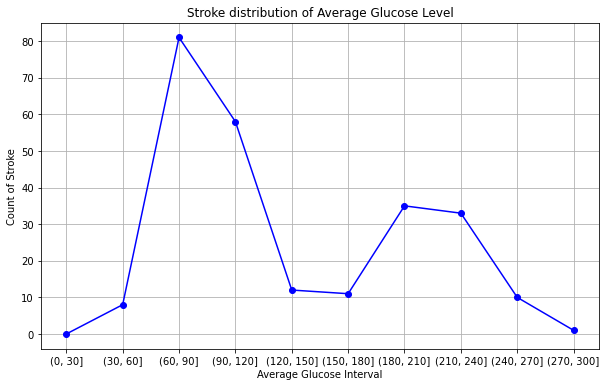

,glucose_range,stroke,counts
1,"(0, 30]",1,0
3,"(30, 60]",1,8
5,"(60, 90]",1,81
7,"(90, 120]",1,58
9,"(120, 150]",1,12
11,"(150, 180]",1,11
13,"(180, 210]",1,35
15,"(210, 240]",1,33
17,"(240, 270]",1,10
19,"(270, 300]",1,1


In [ ]:
#examining the relationship between avg glucose level and stroke
data['glucose_range'] = pd.cut(data['avg_glucose_level'], np.arange(0, 320, 30))
data_groupByGlucose = data.groupby(['glucose_range', 'stroke']).count().reset_index()
data_groupByGlucose = data_groupByGlucose[data_groupByGlucose['stroke']==1]
data_groupByGlucose['counts']=data_groupByGlucose.iloc[:,2]
data_groupByGlucose['glucose_range'] = data_groupByGlucose['glucose_range'].astype(str)
plt.figure(figsize=(10,6))
plt.plot(data_groupByGlucose['glucose_range'],data_groupByGlucose['counts'],'b-o')
plt.ylabel("Count of Stroke")
plt.xlabel("Average Glucose Interval")
plt.title("Stroke distribution of Average Glucose Level")
plt.grid()
plt.show()
data_groupByGlucose = data_groupByGlucose[['glucose_range','stroke','counts']]
data_groupByGlucose

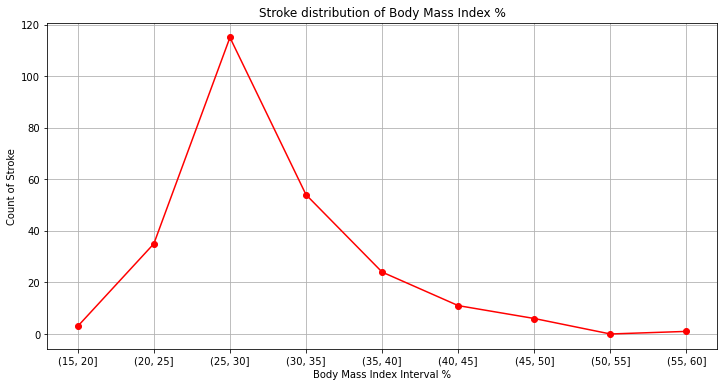

,bmi_range,stroke,counts
1,"(15, 20]",1,3
3,"(20, 25]",1,35
5,"(25, 30]",1,115
7,"(30, 35]",1,54
9,"(35, 40]",1,24
11,"(40, 45]",1,11
13,"(45, 50]",1,6
15,"(50, 55]",1,0
17,"(55, 60]",1,1


In [ ]:
#examining the relationship between bmi and stroke
data['bmi_range'] = pd.cut(data['bmi'], np.arange(15, 65, 5))
data_groupBybmi = data.groupby(['bmi_range', 'stroke']).count().reset_index()
data_groupBybmi = data_groupBybmi[data_groupBybmi['stroke']==1]
data_groupBybmi['counts']=data_groupBybmi.iloc[:,2]
data_groupBybmi['bmi_range'] = data_groupBybmi['bmi_range'].astype(str)
plt.figure(figsize=(12,6))
plt.plot(data_groupBybmi['bmi_range'],data_groupBybmi['counts'],'r-o')
plt.ylabel("Count of Stroke")
plt.xlabel("Body Mass Index Interval %")
plt.title("Stroke distribution of Body Mass Index %")
plt.grid()
plt.show()
data_groupBybmi = data_groupBybmi[['bmi_range','stroke','counts']]
data_groupBybmi

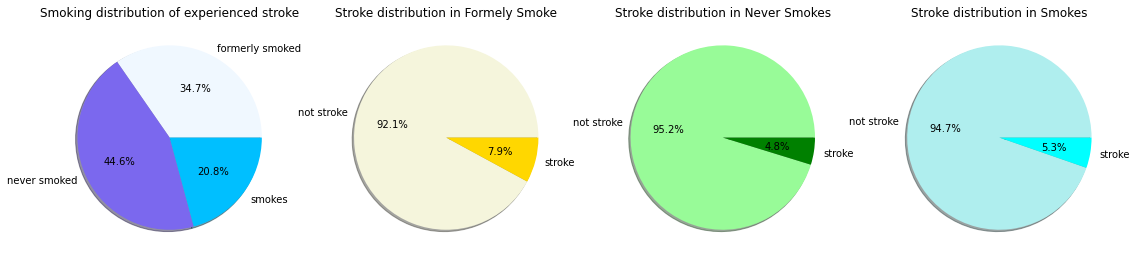

,smoking_status,stroke,counts
0,formerly smoked,0,814
1,formerly smoked,1,70
2,never smoked,0,1802
3,never smoked,1,90
4,smokes,0,747
5,smokes,1,42


In [ ]:
#examining the relationship between somking status and stroke
data2 = data.drop(data[(data['smoking_status'] == "Unknown")].index)
data2['smoking_status'].value_counts()
smoke = data2.groupby(['smoking_status','stroke']).count()
smoke = smoke.reset_index()
smoke['counts'] = smoke.iloc[:,2]
stroke = smoke[smoke['stroke']==1]
formerly = smoke[smoke['smoking_status']=="formerly smoked"]
never = smoke[smoke['smoking_status']=="never smoked"]
smokes = smoke[smoke['smoking_status']=="smokes"]
fig = plt.figure(figsize=(19,8))
ax1 = plt.subplot2grid((1,4),(0,0))
plt.pie(stroke['counts'],labels=stroke['smoking_status'],autopct='%1.1f%%',colors=['#F0F8FF','#7B68EE','#00BFFF'],shadow=True)
plt.title("Smoking distribution of experienced stroke")
ax1 = plt.subplot2grid((1,4),(0,1))
plt.pie(formerly['counts'],labels=['not stroke','stroke'],autopct='%1.1f%%', colors=['#F5F5DC','#FFD700'],shadow=True)
plt.title("Stroke distribution in Formely Smoke")
ax1 = plt.subplot2grid((1,4),(0,2))
plt.pie(never['counts'],labels=['not stroke','stroke'],autopct='%1.1f%%', colors=['#98FB98','#008000'],shadow=True)
plt.title("Stroke distribution in Never Smokes")
ax1 = plt.subplot2grid((1,4),(0,3))
plt.pie(smokes['counts'],labels=['not stroke','stroke'],autopct='%1.1f%%', colors=['#AFEEEE','#00FFFF'],shadow=True)
plt.title("Stroke distribution in Smokes")
plt.show()
smoke = smoke[['smoking_status','stroke','counts']]
smoke

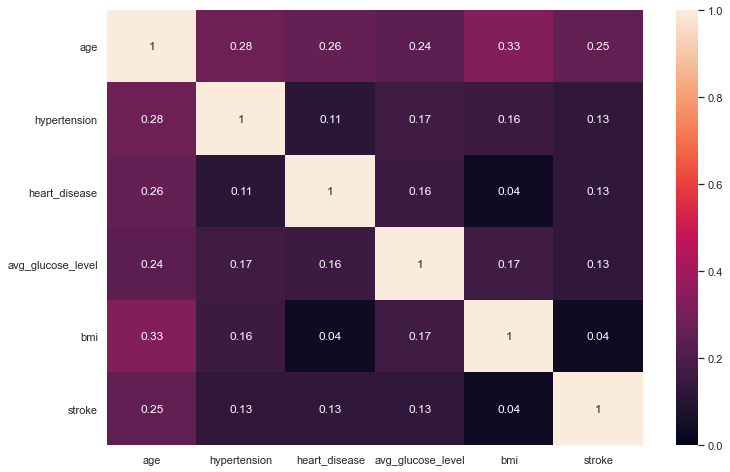

In [ ]:
#correlation matrix for all attributes of data with heat map
corr_mat = data.corr().round(2)
corr_mat
plt.figure(figsize=(12,8))
ax = sns.heatmap(corr_mat,annot = True, vmin=0, vmax=1)

     Correlation Matrix


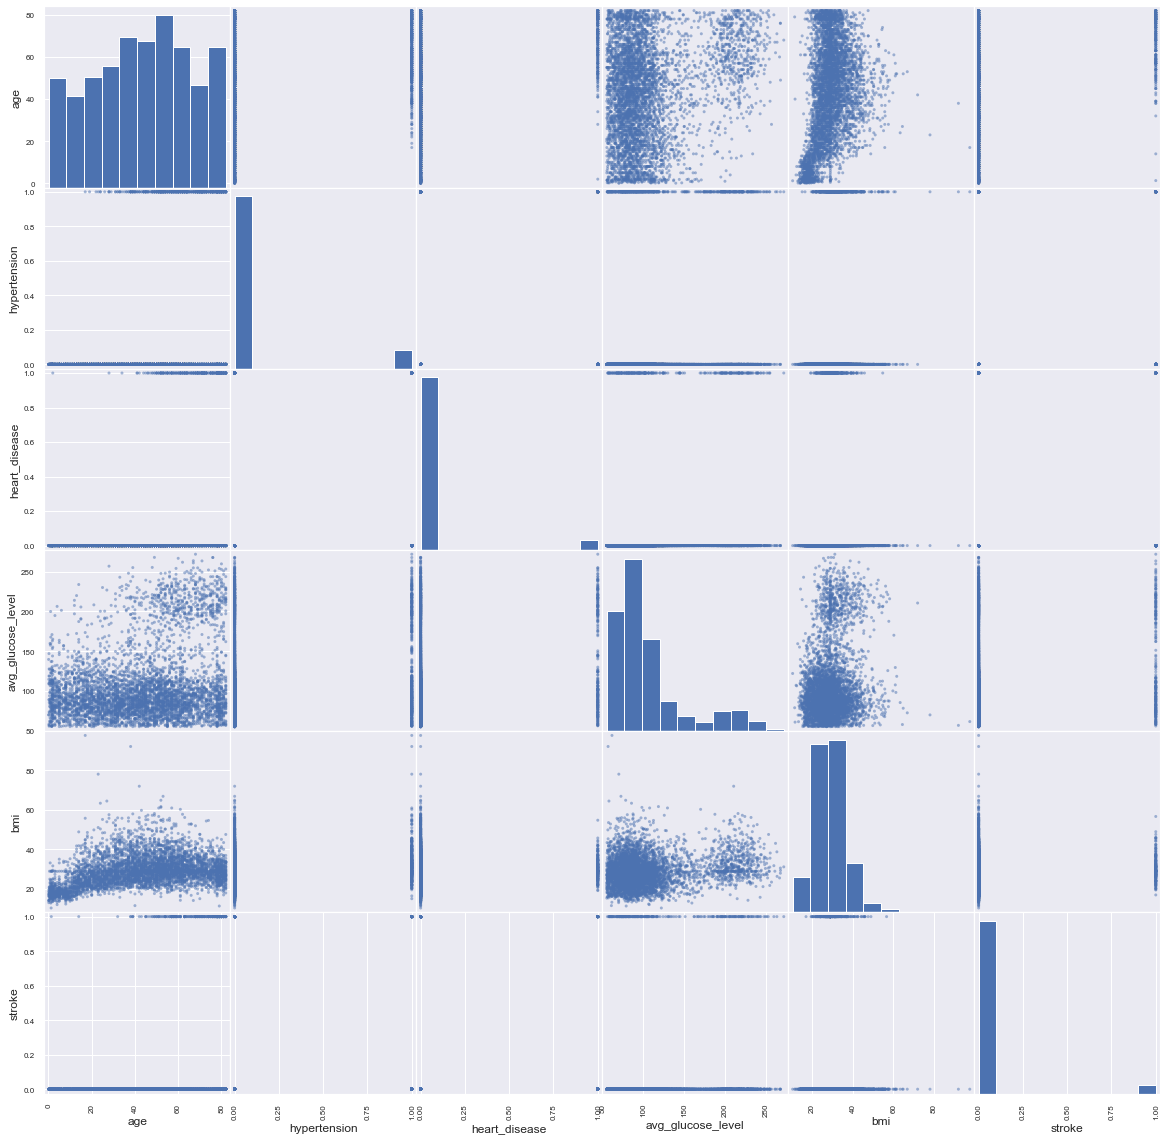

In [ ]:
#visualization of correlation matrix
pd.plotting.scatter_matrix(data, figsize=(20,20))
print("     Correlation Matrix")
plt.show()

* In this project, we exemined and analyzed the 
realtionship between statistical data of stroke patients and patient's population data (gender, age, marital status, type of employment and residence), health records (hypertension, heart disease, mean glucose level measured after meals, Body Mass Index (BMI), smoking status).
* First of all, we obtained the data in our project from Kaggle(https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/version/1). This dataset we obtained is a dataset used to predict whether a patient is likely to have a stroke based on input parameters such as gender, age, various diseases and smoking status. Each row in the data provides relevant information about the patient.
* We started the analysis by first reading the data set. Based on the data set we read, we can say that there are 10 metric data sets for a total of 5110 patients. In addition, according to this data set, we can say that only 249 patients had a stroke, while the remaining 4,861 patients did not have this experience.
* We removed the minority values and null values from the table before analyzing whether there was a relationship between the input parameters in the data set and the stroke.
* We made our analyzes by visualizing the data set. Our results:
1. Women are more likely to have a stroke than men.
2. The probability of having a stroke increases with age.
3. Patients with heart disease are more likely to have a stroke than normal.
4. Patients with hypertension are more likely to have a stroke than normal.
5. Married patients are more likely to have a stroke than those who are single.
6. Patients with a private job are more likely to have a stroke compared to other job types.
7. Patients with urban residence types are more likely to have a stroke than rural patients.
8. Stroke incidence occurred to some patients regardless of the average glucose level measured after meal.
9. Percentage of patient who had BMI between 25 and 30 was the highest to suffer a stroke than patients from other groups. Even after this interval, stroke and BMI progress as reverse training.
10. Smoking status is divided into 3 groups; formally smoked, never smoked and smoke. We cannot make a consistent inference because their samples are not equal.
* After vilsualized dataset, we drew  corrolation heatmeap and corrolation matrix for Stroke dataset.
The results we obtained from them are; variables that are showing some effective correlation are: age, hypertension, heart_disease, ever_married. As we mentioned in the Smoking status section, the reason for the inconsistent results is that the samples of the data compared to each other are not equal.